# Overview

Many of the details of this example were adapted from [Andreu Casas tutorial](http://andreucasas.com/computer_vision/notes/02-use-aws-rekognition.html)

* AWS Rekognition is one of many available image auto-tagging services. There are other options from Microsoft, Google, IBM, Clarifai, etc. All of these are probably using a trained CNN, but most keep their algorithms proprietary so it is hard to know for sure (which is one of the downsides of using these services!). Note that these services may also retain your images and any generated labels, so proceed with caution in terms of privacy and other ethical concerns. We work with AWS here simply because it fits best into the workshop framework, where we use other AWS services.


* Rekognition offers multiple image-tagging calls. In our workshop, we highlight two services: (1) Object and Scene Detection and (2) Celebrity Recognition. See [here](https://aws.amazon.com/rekognition/image-features/) for the full list of available Rekognition calls (content moderation, text extraction, etc.).

# Install Libs

In [1]:
!pip install --upgrade boto3
import IPython.display
IPython.display.clear_output()

# Import Libs

In [5]:
import boto3
import dill
import sys, os, shutil
import pandas as pd
import matplotlib.pyplot as plt

# Define Paths

In [3]:
path_home_dir = os.path.expanduser(os.path.join('~','Desktop'))
path_report_dir = os.path.join(path_home_dir, 'AWS_Rekognition')
path_imgs_dir = os.path.join(path_report_dir, 'imgs')

# Transfer Example Imgs to Report Folder

In [7]:
if os.path.isdir(path_imgs_dir)==True:
    shutil.rmtree(path_imgs_dir)
shutil.copytree('./imgs/',path_imgs_dir)

print('path_imgs_dir:',path_imgs_dir)

path_imgs_dir: /Users/johnleonard/Desktop/AWS_Rekognition/imgs


In [8]:
img_filenames = os.listdir(path_imgs_dir)
img_filenames

['ex_2.jpg', 'ex_3.jpg', 'ex_1.jpg', 'ex_4.jpg', 'ex_5.jpg']

# Load Access Keys

In [9]:
path_access_keys_file = '../accessKeys.csv'

access_keys = pd.read_csv(path_access_keys_file)

personal_access_key = access_keys['Access key ID'].iloc[0]
secret_access_key = access_keys["Secret access key"].iloc[0]

# Start the Client

In [10]:
client = boto3.client(service_name = 'rekognition',
                      region_name = 'us-west-1', 
                      aws_access_key_id = personal_access_key,
                      aws_secret_access_key = secret_access_key)

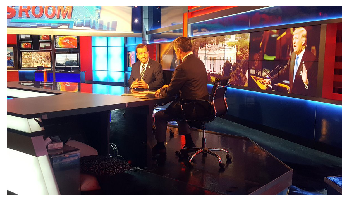

['Person', 'Human', 'Sitting', 'Restaurant', 'Cafeteria', 'Lighting', 'Pub', 'Bar Counter', 'Cafe', 'Flooring', 'People', 'Outdoors', 'Wood', 'Food', 'Food Court', 'Studio', 'Couch', 'Furniture']


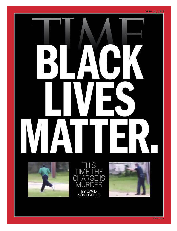

['Person', 'Human', 'Advertisement', 'Poster', 'Flyer', 'Brochure', 'Paper', 'Sports', 'Golf', 'Sport', 'Text']


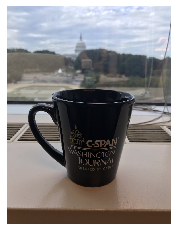

['Cup', 'Coffee Cup']


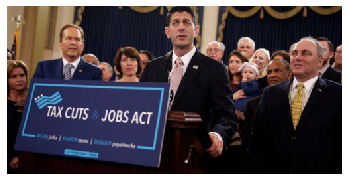

['Human', 'Person', 'Audience', 'Crowd', 'Speech', 'Accessory', 'Tie', 'Accessories', 'Face', 'Lecture', 'People']


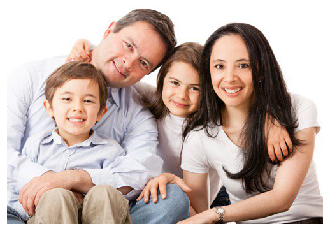

['Human', 'Person', 'People', 'Family', 'Photo', 'Photography', 'Portrait', 'Face']


In [11]:
def fetch_img_labels(client, 
                     path_img_dir, 
                     img_filename,
                     plot_img = False):
    """
    fetch the image labels using AWS Rekognition's 'detect_labels' function
    
    Arguments:
    ----------
        client: boto3.client for the 'rekognition' service
        path_img_dir: path to where the image of interest is stored
        img_filename: filename for the image of interest
        plot_img: boolean. whether or not to plot the image evaluated
        
    Returns:
    --------
        Labels: list of label dictionaries returned from the client response for the aws service
    """
    if plot_img:
        fig, ax = plt.subplots(1,1)
        img = plt.imread(os.path.join(path_img_dir, img_filename))
        
        ax.imshow(img)
        ax.axis('off')
        
    with open(os.path.join(path_img_dir,img_filename),'rb') as img:
        img = img.read()
        response = client.detect_labels(Image = {'Bytes':img})
        
    if plot_img:
        plt.show()
    
    labels = response['Labels']
    return labels

for img_filename in img_filenames:
    labels = fetch_img_labels(client, 
                     path_imgs_dir, 
                     img_filename,
                     plot_img = True)
    print([label['Name'] for label in labels])